In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
path = 'cut_taxi_dataset10000.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,615190,1,2015-01-18 13:41:32,2015-01-18 13:48:20,1,0.70,-73.997345,40.766876,1,N,-73.995995,40.760822,2,6.0,0.0,0.5,0.0,0.0,0.3,6.8
1,4664939,1,2015-01-24 13:27:54,2015-01-24 13:29:25,1,0.30,-74.009911,40.722195,1,N,-74.006523,40.718830,1,3.5,0.0,0.5,1.0,0.0,0.3,5.3
2,6907757,1,2015-01-13 09:14:39,2015-01-13 09:21:22,1,1.10,-73.972107,40.759087,1,N,-73.961357,40.774250,1,7.0,0.0,0.5,3.0,0.0,0.3,10.8
3,2677691,1,2015-01-01 09:37:40,2015-01-01 09:45:39,1,1.90,-73.980270,40.742779,1,N,-74.004913,40.740917,1,8.5,0.0,0.5,1.0,0.0,0.0,10.3
4,6538830,2,2015-01-09 09:18:39,2015-01-09 09:35:01,1,1.64,-73.987671,40.770126,1,N,-73.980522,40.760876,1,11.0,0.0,0.5,2.0,0.0,0.3,13.8


In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.414143e+06,1.513700,1.671500,2.815952,-72.665179,40.029669,1.036200,-72.686902,40.042921,1.380800,11.967229,0.302500,0.497700,1.570898,0.261797,0.281550,14.899634
std,3.680964e+06,0.499837,1.329874,3.471011,9.754737,5.373706,0.270364,9.673125,5.328941,0.497007,10.046838,0.359314,0.034566,2.192115,1.288383,0.072077,12.368970
min,3.345000e+03,1.000000,0.000000,0.000000,-74.186302,0.000000,1.000000,-74.266541,0.000000,1.000000,-5.000000,-1.000000,-0.500000,-1.000000,0.000000,0.000000,-7.800000
25%,3.243759e+06,1.000000,1.000000,1.000000,-73.991611,40.736214,1.000000,-73.991127,40.734100,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000
50%,6.401842e+06,2.000000,1.000000,1.630000,-73.981651,40.753361,1.000000,-73.979668,40.754215,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.000000
75%,9.588834e+06,2.000000,2.000000,3.000000,-73.967228,40.767651,1.000000,-73.962402,40.769181,2.000000,13.500000,0.500000,0.500000,2.100000,0.000000,0.300000,16.300000
max,1.274890e+07,2.000000,6.000000,38.500000,0.000000,40.912895,5.000000,0.000000,41.027847,4.000000,129.500000,1.500000,0.500000,32.820000,19.250000,0.300000,164.120000


In [5]:
#меняем на удобный формат столбцы с датами
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             10000 non-null  int64         
 1   VendorID               10000 non-null  int64         
 2   tpep_pickup_datetime   10000 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  10000 non-null  datetime64[ns]
 4   passenger_count        10000 non-null  int64         
 5   trip_distance          10000 non-null  float64       
 6   pickup_longitude       10000 non-null  float64       
 7   pickup_latitude        10000 non-null  float64       
 8   RateCodeID             10000 non-null  int64         
 9   store_and_fwd_flag     10000 non-null  object        
 10  dropoff_longitude      10000 non-null  float64       
 11  dropoff_latitude       10000 non-null  float64       
 12  payment_type           10000 non-null  int64         
 13  fa

In [7]:
df = df[df['total_amount'] > 0] #очистили записи с нулевыми и отрицательными значения стоимости поездки
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             9998 non-null   int64         
 1   VendorID               9998 non-null   int64         
 2   tpep_pickup_datetime   9998 non-null   datetime64[ns]
 3   tpep_dropoff_datetime  9998 non-null   datetime64[ns]
 4   passenger_count        9998 non-null   int64         
 5   trip_distance          9998 non-null   float64       
 6   pickup_longitude       9998 non-null   float64       
 7   pickup_latitude        9998 non-null   float64       
 8   RateCodeID             9998 non-null   int64         
 9   store_and_fwd_flag     9998 non-null   object        
 10  dropoff_longitude      9998 non-null   float64       
 11  dropoff_latitude       9998 non-null   float64       
 12  payment_type           9998 non-null   int64         
 13  fare_amo

In [8]:
df.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.998000e+03,9998.000000,9998,9998,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,6.413916e+06,1.513603,2015-01-16 11:29:34.504000768,2015-01-16 11:41:59.069713920,1.671134,2.816459,-72.664923,40.029522,1.036207,-72.686650,40.042777,1.380476,11.970123,0.302661,0.497850,1.571312,0.261849,0.281546,14.903395
min,3.345000e+03,1.000000,2015-01-01 00:03:20,2015-01-01 00:18:09,0.000000,0.000000,-74.186302,0.000000,1.000000,-74.266541,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000
25%,3.243100e+06,1.000000,2015-01-09 01:49:50.249999872,2015-01-09 02:11:17.249999872,1.000000,1.000000,-73.991619,40.736214,1.000000,-73.991127,40.734100,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000
50%,6.401842e+06,2.000000,2015-01-16 09:02:59,2015-01-16 09:18:42,1.000000,1.630000,-73.981651,40.753347,1.000000,-73.979671,40.754204,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.000000
75%,9.587806e+06,2.000000,2015-01-23 17:00:33.750000128,2015-01-23 17:13:17.750000128,2.000000,3.000000,-73.967249,40.767647,1.000000,-73.962410,40.769179,2.000000,13.500000,0.500000,0.500000,2.100000,0.000000,0.300000,16.300000
max,1.274890e+07,2.000000,2015-01-31 23:56:21,2015-02-01 00:11:54,6.000000,38.500000,0.000000,40.912895,5.000000,0.000000,41.027847,4.000000,129.500000,1.500000,0.500000,32.820000,19.250000,0.300000,164.120000
std,3.680909e+06,0.499840,NaN,NaN,1.329285,3.471170,9.755696,5.374233,0.270391,9.674076,5.329464,0.496327,10.045696,0.359101,0.032722,2.192127,1.288506,0.072084,12.367226


In [9]:
df_2 = pd.read_csv('student_health_data.csv')

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [11]:
df_2.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325


In [12]:
df_2.head(20)

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate
5,6,22,M,61.744152,90.000000,84.450865,4.262518,6.825001,Moderate,Good,Happy,44.948229,15.651195,Moderate
6,7,22,F,93.097228,106.677782,76.499815,8.415979,1.402915,Moderate,Moderate,Happy,10.269850,23.818096,Moderate
7,8,24,F,63.361031,115.396783,70.039502,2.836789,1.486429,Low,Good,Neutral,39.641788,19.315439,Low
8,9,19,F,81.671029,142.820977,74.676877,5.221367,5.115074,Moderate,Moderate,Neutral,37.211195,8.854986,Moderate
9,10,20,M,86.211086,112.635938,91.951392,8.208448,5.946601,Moderate,Moderate,Happy,33.195541,19.744741,Moderate


## 2.

Ядерная оценка плотности (ЯОП, англ. Kernel Density Estimation, KDE) — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных.

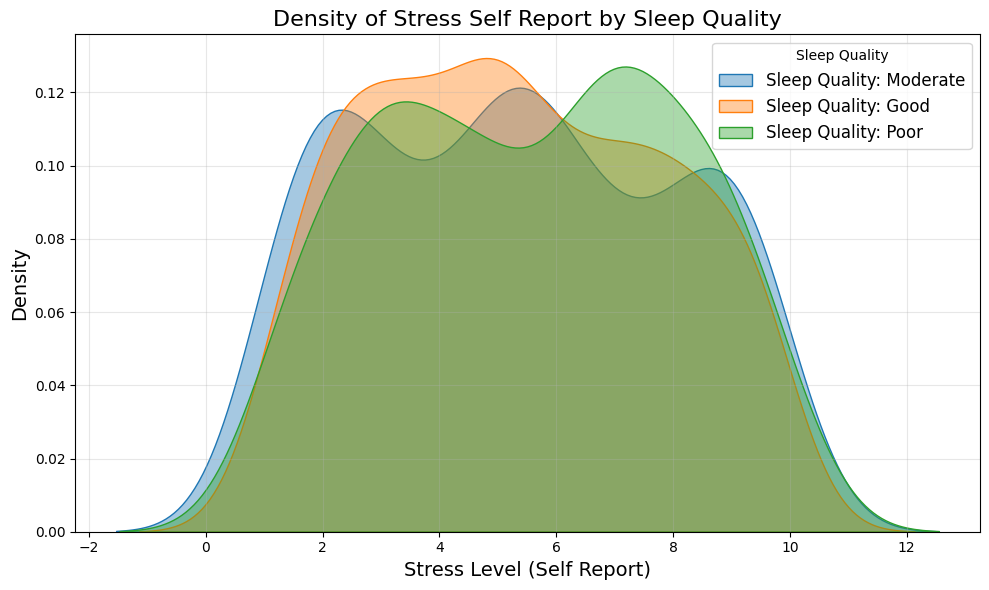

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

sleep_quality_categories = df_2['Sleep_Quality'].unique()
plt.figure(figsize=(10, 6))

for quality in sleep_quality_categories:
    data = df_2[df_2['Sleep_Quality'] == quality]['Stress_Level_Self_Report']
    sns.kdeplot(
        data,
        label=f"Sleep Quality: {quality}",
        fill=True,
        alpha=0.4
    )

plt.title("Density of Stress Self Report by Sleep Quality", fontsize=16)
plt.xlabel("Stress Level (Self Report)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Sleep Quality", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

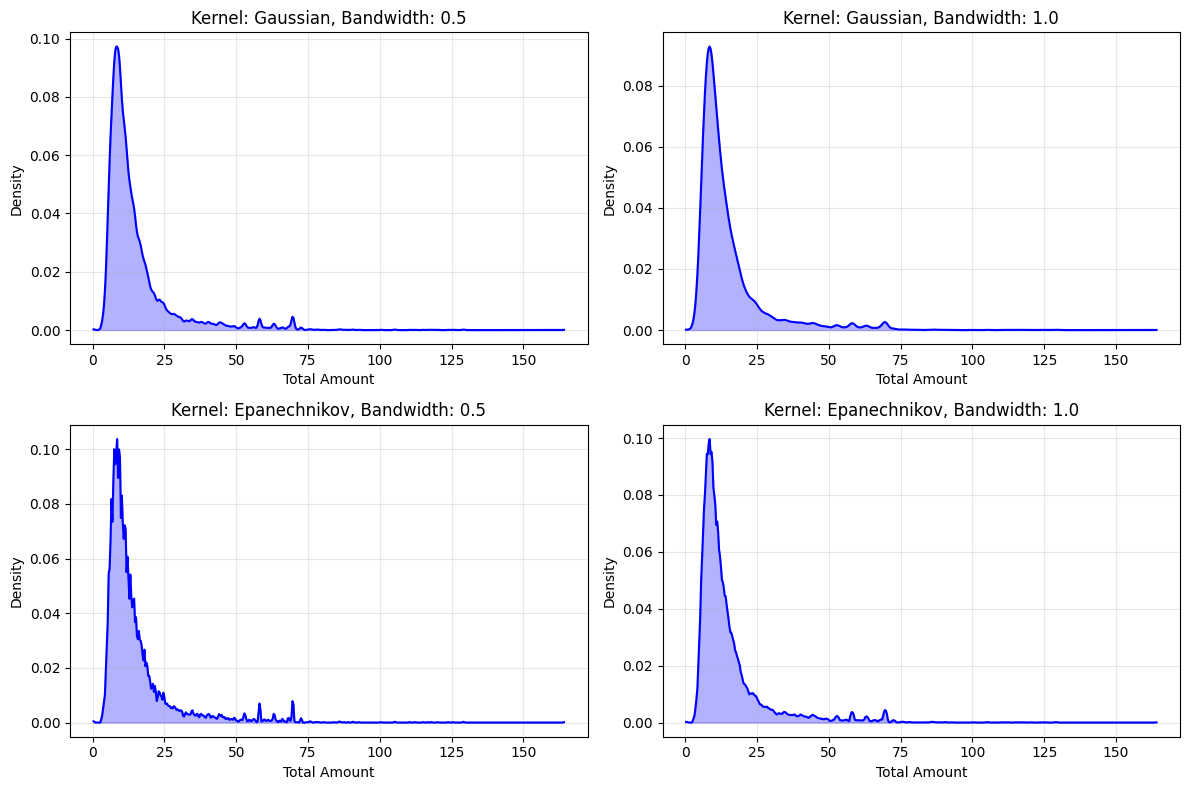

In [14]:
kernels = ['gaussian', 'epanechnikov']
bandwidths = [0.5, 1.0]

fig, axes = plt.subplots(len(kernels), len(bandwidths), figsize=(12, 8))
axes = axes.flatten()

for i, kernel in enumerate(kernels):
    for j, bandwidth in enumerate(bandwidths):
        ax = axes[i * len(bandwidths) + j]
        data = df['total_amount'].dropna().values[:, None]
        kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
        kde.fit(data)
        grid = np.linspace(data.min(), data.max(), 500)[:, None]
        density = np.exp(kde.score_samples(grid))
        
        ax.plot(grid, density, label=f"{kernel.capitalize()}, bw={bandwidth}", color='blue')
        ax.fill_between(grid.flatten(), density, alpha=0.3, color='blue')
        ax.set_title(f"Kernel: {kernel.capitalize()}, Bandwidth: {bandwidth}")
        ax.set_xlabel("Total Amount")
        ax.set_ylabel("Density")
        ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


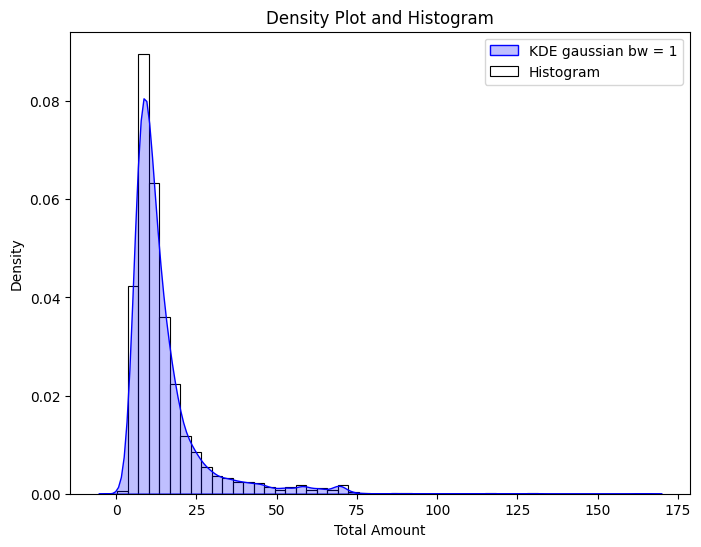

In [15]:
plt.figure(figsize=(8, 6))

sns.histplot(df.total_amount, kde=False, color="white", stat="density", bins=50, label="Histogram", alpha=0.6)
sns.kdeplot(df.total_amount, fill=True, kernel="gau", bw_adjust=1, color="blue", label="KDE gaussian bw = 1")

plt.title('Density Plot and Histogram')
plt.xlabel('Total Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

## 3. Реализовать анализ данных с помощью cdplot, dotchart, boxplot и stripchart.

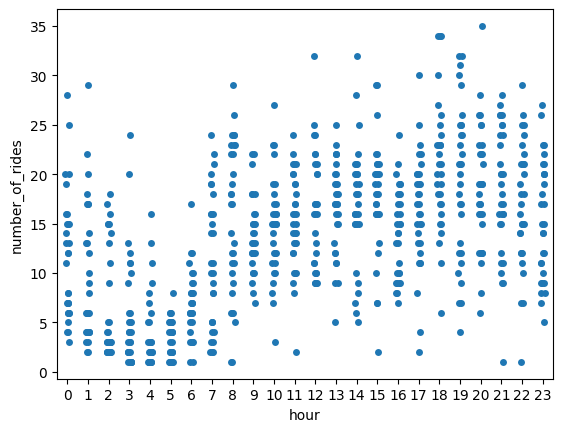

In [16]:
import matplotlib.pyplot as plt
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['date'] = df['tpep_pickup_datetime'].dt.date
r = df.groupby(['date', 'hour']).size().reset_index(name = 'number_of_rides')
sns.stripplot(x='hour',y='number_of_rides', data = r)
plt.show()

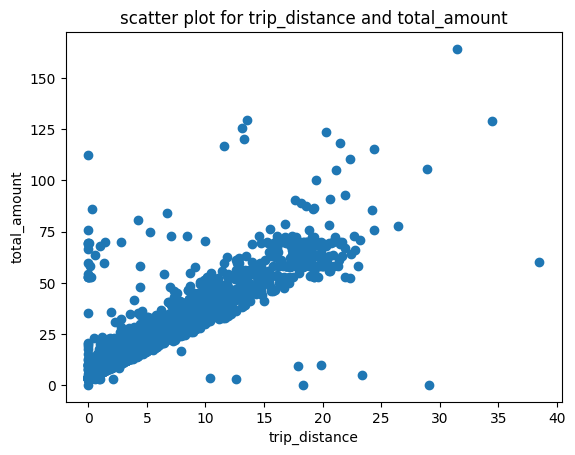

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['trip_distance'],df['total_amount'])
plt.title('scatter plot for trip_distance and total_amount')
plt.xlabel('trip_distance')
plt.ylabel('total_amount')
plt.show()

In [18]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'

df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(categorize_time_of_day)

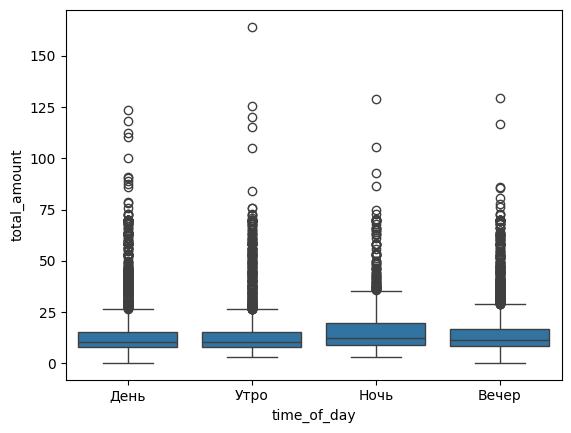

In [19]:
sns.boxplot(x = 'time_of_day', y = 'total_amount', data = df)
plt.show()

<Figure size 800x600 with 0 Axes>

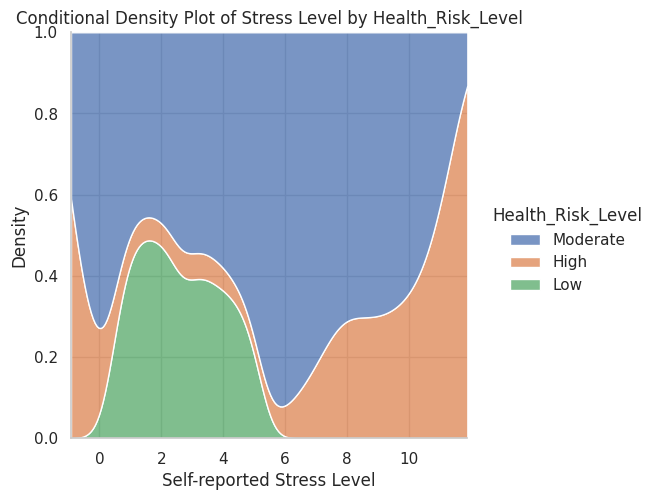

In [20]:
# Исследование зависимости стресса по качеству сна
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.displot(x="Stress_Level_Self_Report", hue="Health_Risk_Level", data=df_2, kind="kde", fill=True, multiple = 'fill')

plt.title('Conditional Density Plot of Stress Level by Health_Risk_Level')
plt.xlabel('Self-reported Stress Level')
plt.ylabel('Density')

plt.show()

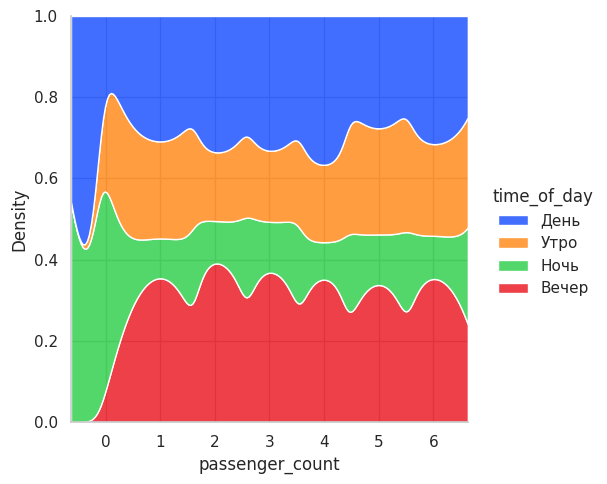

In [21]:
#df3 = pd.read_csv('cut_taxi_dataset.csv')
#df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
#df3['time_of_day'] = df3['tpep_pickup_datetime'].dt.hour.apply(categorize_time_of_day)
sns.displot(data = df, hue = 'time_of_day', palette = 'bright', x = 'passenger_count', multiple = 'fill', kind = 'kde')
plt.show()

In [22]:

df.to_csv('categorized_time.csv', index = False)

## 4. Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализировать результаты.

Рассмотрим следующие данные:
day_calls - массив, содержащий, данные, сколько вызовов такси было за день

In [23]:
df['date'] = df['tpep_pickup_datetime'].dt.date
day_calls = df.groupby(df['date']).size()

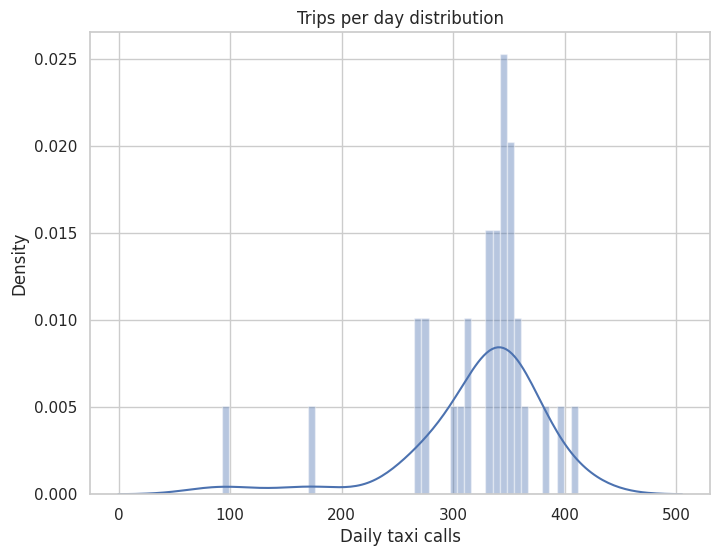

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.distplot(day_calls, bins = 50, kde = True)

plt.title('Trips per day distribution')
plt.xlabel('Daily taxi calls')
plt.ylabel('Density')

plt.show()

In [25]:
day_calls.min()

93

По гистограмме видим, что распределение похоже на нормальное, и видим, что есть несколько выбивающихся значений. Например, число вызовов - 93, которое мы можем увидеть, вызвав функцию минимума для этого массива.

Проверим, действительно ли эти данные распределены нормально. Это понадобится в дальнейшем для применения критериев Граббса и Диксона. Проверять будем очищенные данные, отбросим слишком маленькие значения, которые могут оказаться выбросами. Для проверки воспользуемся критерием Шапиро.

In [26]:
day_calls_clear = day_calls[day_calls > 200]

In [27]:
stats.shapiro(day_calls_clear)

ShapiroResult(statistic=0.9375711679458618, pvalue=0.08661450445652008)

Критерий Шапиро дал результат pvalue=0.08661450445652008, значит, мы можем не отвергать гипотезу о нормальности выборки.

In [28]:
# сохраним day_calls в новый датасет, чтобы не повторять его создание на r
# day_calls.to_csv('day_calls.csv', index = False)

In [29]:
day_calls_clear.describe()

count     29.000000
mean     335.586207
std       35.183719
min      268.000000
25%      313.000000
50%      343.000000
75%      350.000000
max      412.000000
dtype: float64

#### Критерий Граббса

Критерий Граббса используется для определения выбросов в одномерных данных. Он основан на статистическом анализе, который позволяет выявить один выброс в наборе данных. Важно отметить, что критерий Граббса применяется только к данным, которые имеют нормальное распределение




In [30]:
#Функции, которые реализуют критерий Граббса
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print(f"Grubbs Statistics Value: {Gcal}")
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print(f"Grubbs Critical Value: {critical_value}")
    return critical_value

def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print(f"{inp[max_index]} is an outlier")
    else:
        print(f"{inp[max_index]} is not an outlier")

In [31]:
Gcritical = calculate_critical_value(len(day_calls), 0.05)
Gstat, max_index = grubbs_stat(day_calls)
check_G_values(Gstat, Gcritical, day_calls, max_index)

Grubbs Critical Value: 2.9235705613300507
Grubbs Statistics Value: 3.7740817643385816
93 is an outlier


Значение 93 действительно является выбросом.

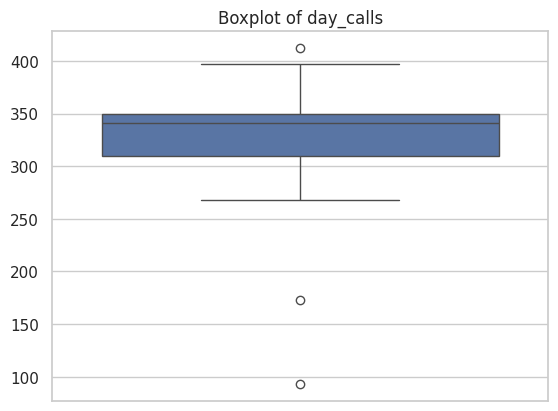

In [32]:
sns.boxplot(day_calls)
plt.title('Boxplot of day_calls')
plt.show()

In [33]:
def dixon_test(data, alpha=0.05):
    """
    Реализует критерий Диксона для обнаружения выбросов в выборке.
    
    Параметры:
    data (list or array): Одномерный массив данных.
    alpha (float): Уровень значимости для теста (например, 0.05).
    
    Возвращает:
    tuple: (is_outlier, outlier_value) - булевое значение, указывающее, 
           является ли выбросом минимальное или максимальное значение, 
           и само значение выброса (или None, если выброс не найден).
    """
    data = np.array(data)
    n = len(data)
    
    if n < 3 or n > 31:
        raise ValueError("Критерий Диксона применим для выборок размером от 3 до 30.")

    # Сортируем данные
    sorted_data = np.sort(data)
    
    # Вычисляем статистику Q для минимального и максимального значения
    q_min = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
    q_max = (sorted_data[-1] - sorted_data[-2]) / (sorted_data[-1] - sorted_data[0])

    # Критическое значение для выбранного уровня значимости
    q_crit = dixon_critical_value(n, alpha)
    
    # Проверяем, является ли минимальное или максимальное значение выбросом
    if q_min > q_crit:
        return True, sorted_data[0]  # Минимальное значение — выброс
    elif q_max > q_crit:
        return True, sorted_data[-1]  # Максимальное значение — выброс
    else:
        return False, None  # Нет выбросов

def dixon_critical_value(n, alpha=0.05):
    """
    Возвращает критическое значение Q критерия Диксона для заданного размера выборки и уровня значимости.
    
    Параметры:
    n (int): Размер выборки.
    alpha (float): Уровень значимости (например, 0.05).
    
    Возвращает:
    float: Критическое значение Q.
    """
    # Таблица критических значений Q для различных размеров выборки и уровней значимости.
    # Ключи — размер выборки (n), значения — критические значения Q для уровней 0.10 и 0.05.
    q_table = {
        3: {0.10: 0.941, 0.05: 0.970},
        4: {0.10: 0.765, 0.05: 0.829},
        5: {0.10: 0.642, 0.05: 0.710},
        6: {0.10: 0.560, 0.05: 0.625},
        7: {0.10: 0.507, 0.05: 0.568},
        8: {0.10: 0.468, 0.05: 0.526},
        9: {0.10: 0.437, 0.05: 0.493},
        10: {0.10: 0.412, 0.05: 0.466},
        11: {0.10: 0.392, 0.05: 0.444},
        12: {0.10: 0.376, 0.05: 0.426},
        13: {0.10: 0.361, 0.05: 0.410},
        14: {0.10: 0.349, 0.05: 0.396},
        15: {0.10: 0.338, 0.05: 0.384},
        16: {0.10: 0.329, 0.05: 0.374},
        17: {0.10: 0.320, 0.05: 0.365},
        18: {0.10: 0.313, 0.05: 0.356},
        19: {0.10: 0.306, 0.05: 0.349},
        20: {0.10: 0.300, 0.05: 0.342},
        25: {0.10: 0.275, 0.05: 0.317},
        29: {0.05: 0.269},
        30: {0.10: 0.256, 0.05: 0.300},
        31: {0.05: 0.255}
    }

    if n in q_table:
        if alpha in q_table[n]:
            return q_table[n][alpha]
        else:
            raise ValueError(f"Уровень значимости {alpha} не поддерживается.")
    else:
        raise ValueError(f"Размер выборки {n} не поддерживается.")

In [34]:
is_outlier, outlier_value = dixon_test(day_calls, alpha=0.05)
if is_outlier:
    print(f"Найден выброс: {outlier_value}")
else:
    print("Выбросов не найдено.")

Выбросов не найдено.


## 5.Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями.

#### Заполнение пропусков модой.
В случае категориальной дискретной характеристики наиболее часто используется заполнение модой.

In [35]:
#рассмотрим датасет поменьше - это случаная выборка из большого датасета
df1 = pd.read_csv('cut_taxi_dataset.csv')

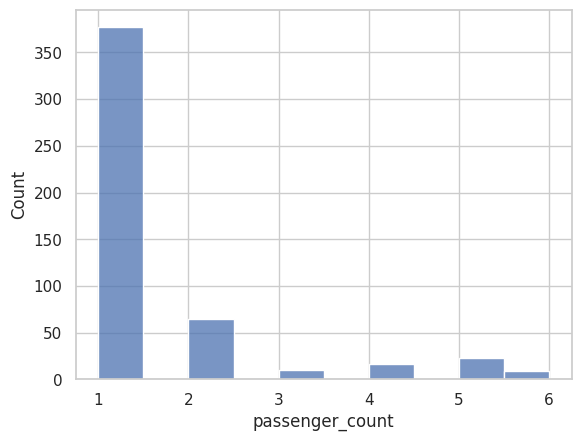

In [36]:
sns_plot = sns.histplot(df1.passenger_count, kde = False)
fig = sns_plot.get_figure()

In [37]:
df5 = df1.passenger_count.copy(deep=True) # будем работать с df5
df5.iloc[::5] = np.nan   # вносим пропуски на каждое 20-е значение
df5.isnull().sum()

100

Внесли 100 пропусков вручную. Заполним их модой

In [38]:
mode = df5.mode()[0]       # мода
df5_filled = df5.fillna(mode)

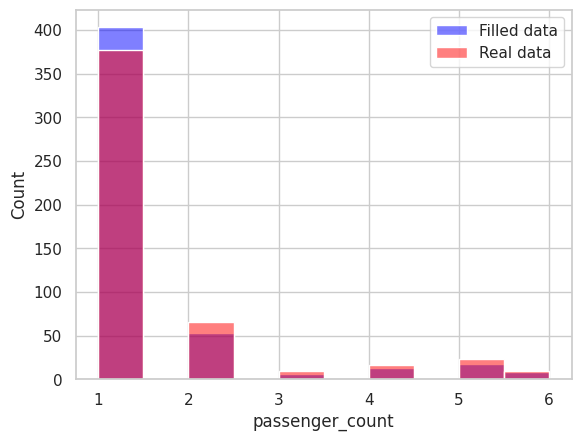

In [39]:
sns_plot = sns.histplot(df5_filled, kde = False, color = 'blue', label = 'Filled data', alpha = 0.5)
sns_plot = sns.histplot(df1.passenger_count, kde = False, color = 'red', label = 'Real data',alpha = 0.5)
plt.legend()
fig = sns_plot.get_figure()
plt.show()

Так как мода очень выражена - распределение почти не изменилось.

#### Заполнение медианным значением. Заполнение средним значением.

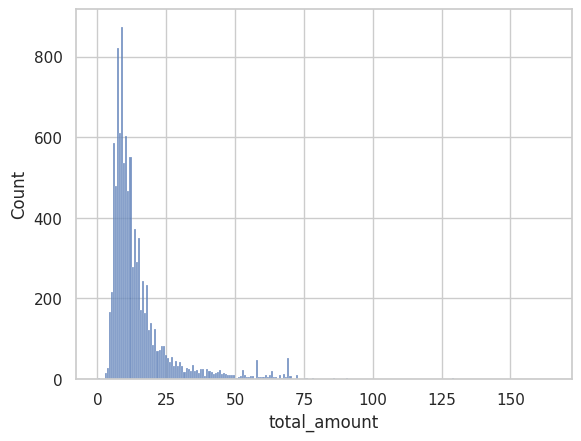

In [40]:
sns_plot = sns.histplot(df.total_amount, kde = False)
fig = sns_plot.get_figure()

In [41]:
# здесь снова смотрим большой датасет
df5_med = df.total_amount.copy(deep=True)
df5_mean = df.total_amount.copy(deep=True)

In [42]:
df5_med.iloc[::20] = np.nan   # вносим пропуски на каждое 20-е значение
df5_med.isnull().sum()

df5_mean.iloc[::20] = np.nan   # вносим пропуски на каждое 20-е значение
df5_mean.isnull().sum()

500

In [43]:
df5_med.fillna(df5.median(), inplace=True) # Заполняем медианой
df5_mean.fillna(df5.mean(), inplace=True)  # Заполняем средним

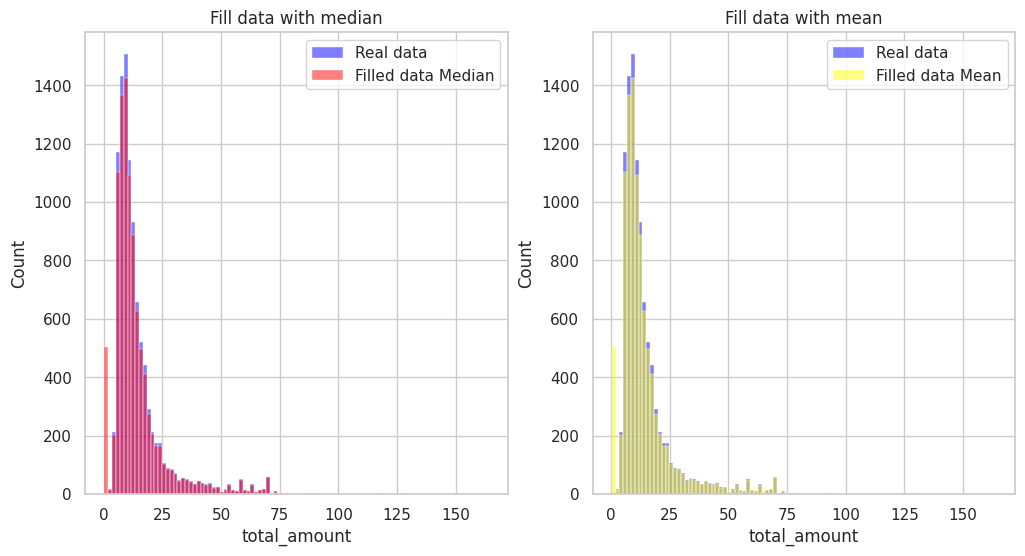

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))


sns.histplot(df.total_amount, kde = False, color = 'blue', bins = 100, label = 'Real data',alpha = 0.5, ax = ax[0])
sns.histplot(df5_med, kde = False, color = 'red', bins = 100, label = 'Filled data Median', alpha = 0.5, ax = ax[0])
ax[0].set_title('Fill data with median')
ax[0].legend()

sns.histplot(df.total_amount, kde = False, color = 'blue', bins = 100, label = 'Real data',alpha = 0.5, ax = ax[1])
sns.histplot(df5_mean, kde = False, color = 'yellow', bins = 100,  label = 'Filled data Mean', alpha = 0.5, ax = ax[1])
ax[1].set_title('Fill data with mean')
ax[1].legend()

plt.show()

На этих данных заполнение медианой сработало лучше, так как в них есть выбросы, к которым неустойчиво среднее значение.
 Так же данные сосредоточены в одном месте.

## 6. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, Шапиро-Уилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.

In [45]:
small_sample = np.random.normal(loc=0, scale=1, size=50)  # Маленькая выборка
moderate_sample = np.random.normal(loc=0, scale=1, size=1000)  # Умеренная выборка

In [46]:
def plot_ecdf(data, sample_size):
    # Построение графика ECDF
    sns.ecdfplot(data, label=f'ECDF (n={sample_size})')
    plt.title(f'ECDF для выборки (n={sample_size})')
    plt.xlabel('Значение')
    plt.ylabel('Эмпирическая функция распределения')
    plt.legend()
    plt.grid()
    plt.show()


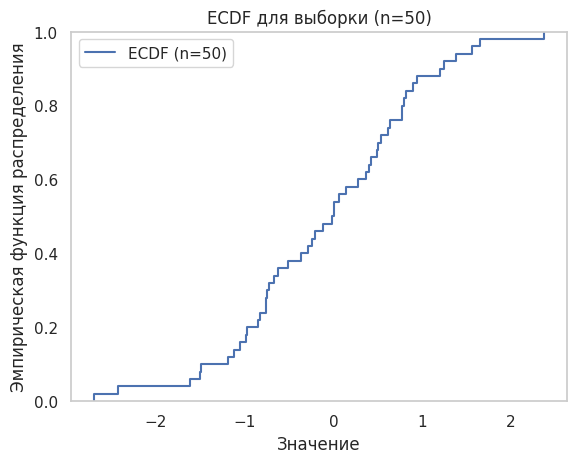

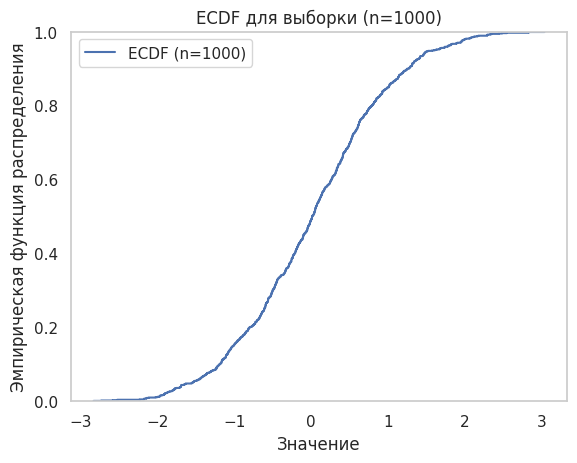

In [47]:
# Построение графиков ECDF для выборок
plot_ecdf(small_sample, len(small_sample))
plot_ecdf(moderate_sample, len(moderate_sample))

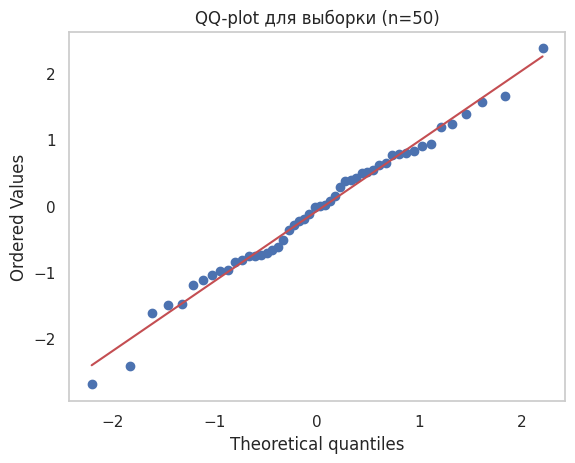

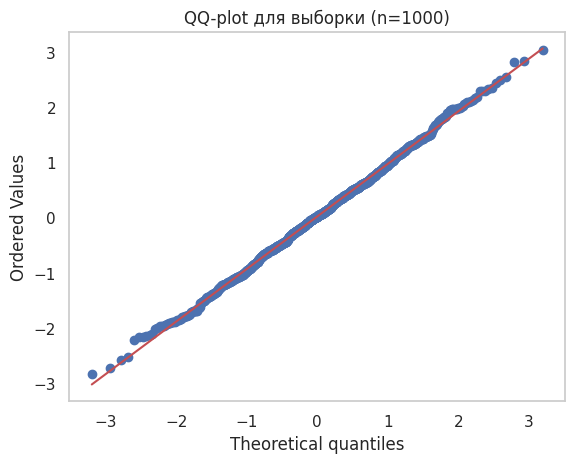

In [48]:
def plot_qq(data, sample_size):
    plt.figure()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ-plot для выборки (n={sample_size})')
    plt.grid()
    plt.show()

# Построение QQ-графиков для выборок
plot_qq(small_sample, len(small_sample))
plot_qq(moderate_sample, len(moderate_sample))

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_envelopes(data, alpha=0.05):
    """
    Проверка нормальности распределения данных с помощью метода огибающих.

    Параметры:
    data (array-like): Входные данные для проверки.
    alpha (float): Уровень значимости (по умолчанию 0.05).

    Возвращает:
    None
    """
    # Сортируем данные
    sorted_data = np.sort(data)
    
    # Вычисляем эмпирическую функцию распределения (ЭФР)
    n = len(sorted_data)
    ecdf = np.arange(1, n + 1) / n
    
    # Вычисляем теоретическую функцию распределения (ФР) нормального распределения
    mean = np.mean(sorted_data)
    std = np.std(sorted_data, ddof=1)  # Используем несмещенную оценку стандартного отклонения
    norm_cdf = norm.cdf(sorted_data, loc=mean, scale=std)
    
    # Вычисляем огибающие
    z = norm.ppf(1 - alpha / 2)  # Квантиль стандартного нормального распределения
    lower_envelope = norm_cdf - z * np.sqrt(norm_cdf * (1 - norm_cdf) / n)
    upper_envelope = norm_cdf + z * np.sqrt(norm_cdf * (1 - norm_cdf) / n)
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, ecdf, 'bo', label='ЭФР')
    plt.plot(sorted_data, norm_cdf, 'r-', label='ФР нормального распределения')
    plt.plot(sorted_data, lower_envelope, 'g--', label=f'Нижняя огибающая (alpha={alpha})')
    plt.plot(sorted_data, upper_envelope, 'g--', label=f'Верхняя огибающая (alpha={alpha})')
    plt.legend()
    plt.xlabel('Значения данных')
    plt.ylabel('Функция распределения')
    plt.title('Метод огибающих для проверки нормальности')
    plt.grid(True)
    plt.show()


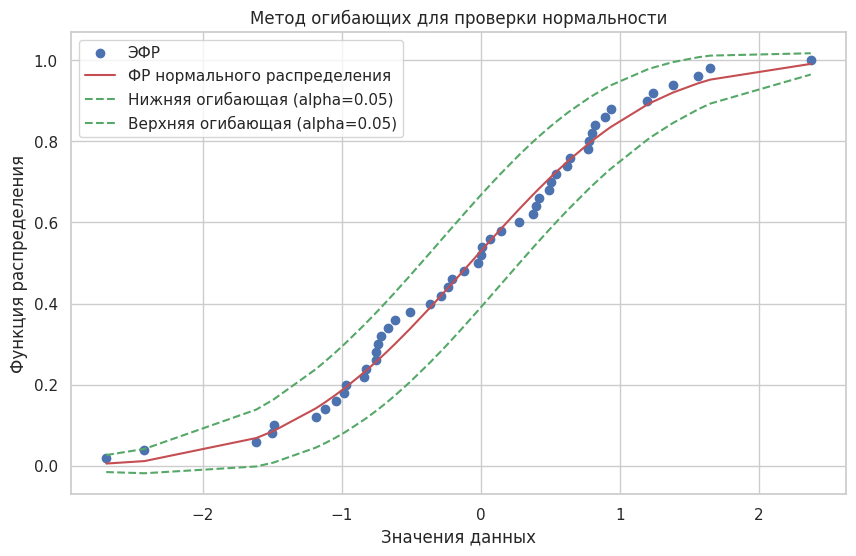

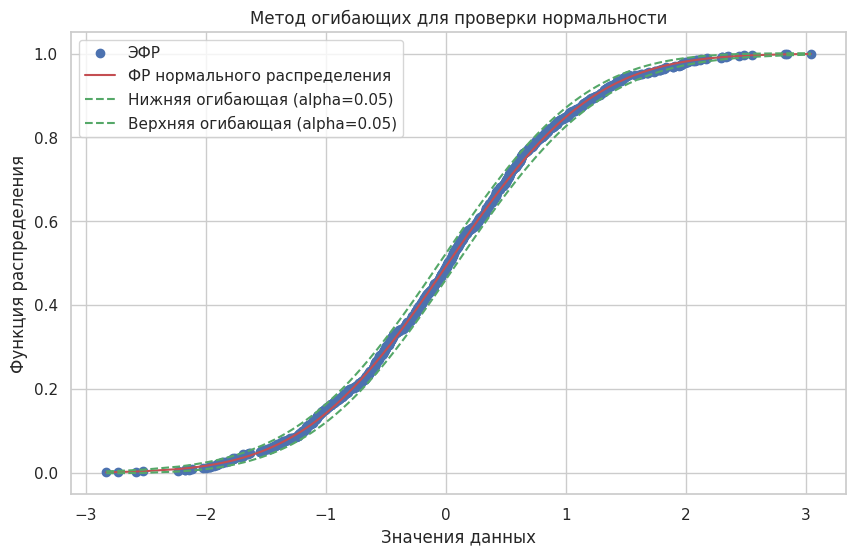

In [50]:
plot_envelopes(small_sample)
plot_envelopes(moderate_sample)

In [51]:
!pip install statsmodels
!pip install sfrancia
import statsmodels.api as sm
from sfrancia import shapiroFrancia

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [52]:
# Функция для проведения тестов нормальности
def normality_tests(data, title):
    print(f"\nNormality Tests for {title}")
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"Kolmogorov-Smirnov test: Stat={ks_stat}, p-value={ks_p}")
    
    sw_stat, sw_p = stats.shapiro(data)
    print(f"Shapiro-Wilk test: Stat={sw_stat}, p-value={sw_p}")
    
    ad_stat, ad_crit, ad_significance = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling test: Stat={ad_stat}")
    
    cm_result = stats.cramervonmises(data, 'norm')
    print(f"Cramer-von Mises test: Stat={cm_result.statistic:.4f}, p-value={cm_result.pvalue:.4f}")

    try:
        lilliefors_stat, lilliefors_p = sm.stats.lilliefors(data)
        print(f"Lilliefors test: Stat={lilliefors_stat}, p-value={lilliefors_p}")
    except Exception as e:
        print(f"Lilliefors test could not be performed: {e}")

    sf_res = shapiroFrancia(data)
    print(f"Shapiro-Francia test: p-value={sf_res['p-value']:.4f}")


In [53]:
normality_tests(small_sample, 'Small Sample (n=50)')
normality_tests(moderate_sample, 'Moderate Sample (n=1000)')


Normality Tests for Small Sample (n=50)
Kolmogorov-Smirnov test: Stat=0.06887979608341455, p-value=0.9585122851467982
Shapiro-Wilk test: Stat=0.9897605180740356, p-value=0.940428614616394
Anderson-Darling test: Stat=0.20739532029330832
Cramer-von Mises test: Stat=0.0472, p-value=0.8949
Lilliefors test: Stat=0.06728618242701401, p-value=0.8206447659309751
Shapiro-Francia test: p-value=0.8103

Normality Tests for Moderate Sample (n=1000)
Kolmogorov-Smirnov test: Stat=0.01735482094656926, p-value=0.9187825768376661
Shapiro-Wilk test: Stat=0.9986611604690552, p-value=0.6623204350471497
Anderson-Darling test: Stat=0.2669633052306608
Cramer-von Mises test: Stat=0.1434, p-value=0.4104
Lilliefors test: Stat=0.017460537909785967, p-value=0.7255435742615776
Shapiro-Francia test: p-value=0.7500


## 7. Продемонстрировать пример анализа данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.

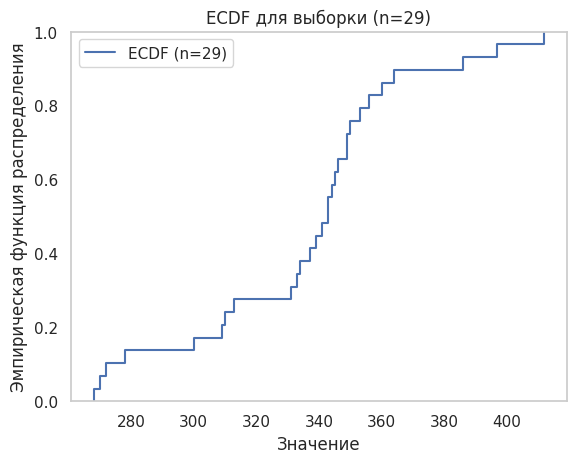

In [54]:
d_small = day_calls_clear

plot_ecdf(d_small, len(d_small))

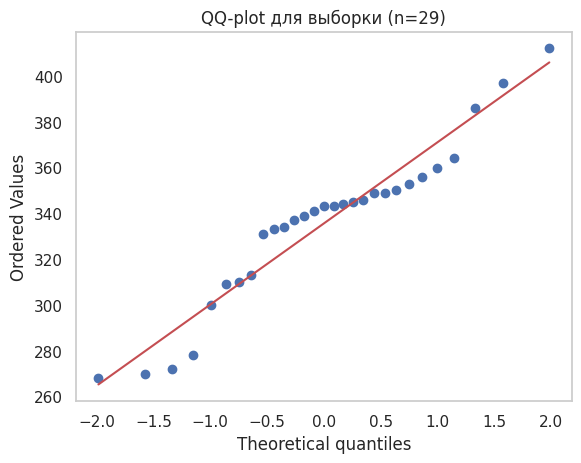

In [55]:
plot_qq(d_small, len(d_small))

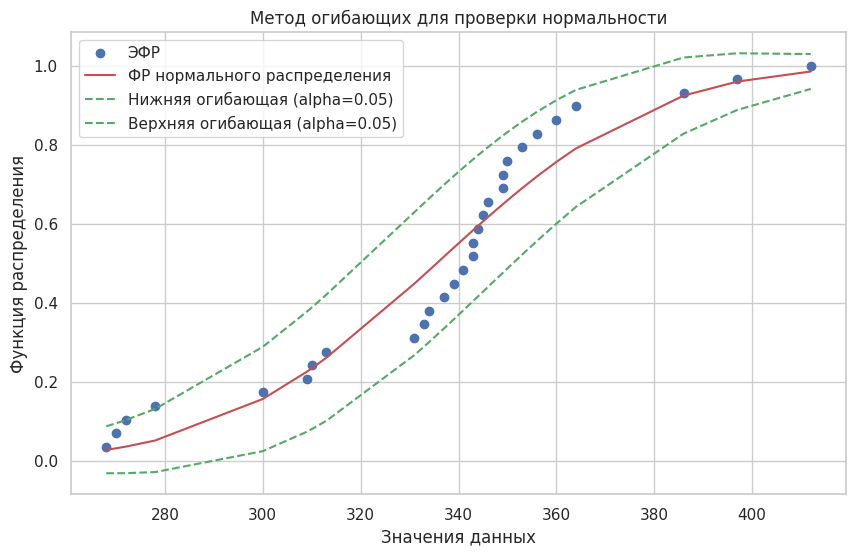

In [56]:
plot_envelopes(d_small)

In [57]:
normality_tests(d_small, "Small sample (n = 29):")


Normality Tests for Small sample (n = 29):
Kolmogorov-Smirnov test: Stat=0.17137005008105888, p-value=0.3240622974643921
Shapiro-Wilk test: Stat=0.9375711679458618, p-value=0.08661450445652008
Anderson-Darling test: Stat=0.8502494551162023
Cramer-von Mises test: Stat=9.6667, p-value=0.0000
Lilliefors test: Stat=0.17228259016974462, p-value=0.027817409658110255
Shapiro-Francia test: p-value=0.0843


In [58]:
d_small_2 = df['fare_amount'].sample(n = 50, random_state = 42)

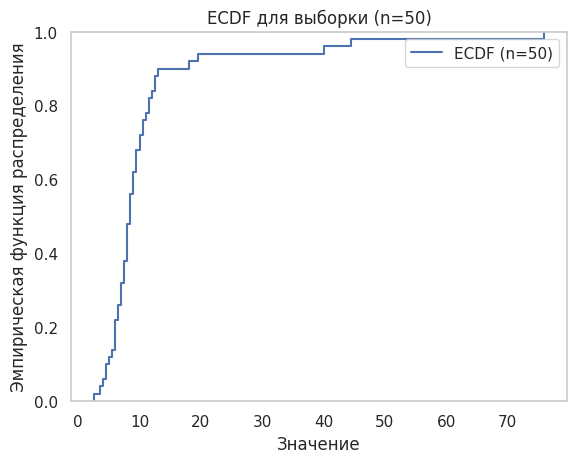

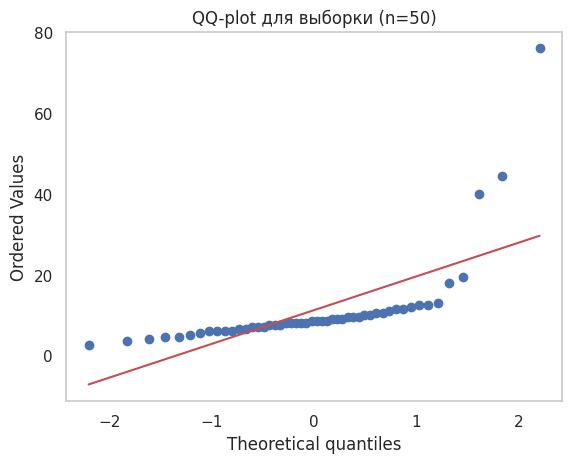

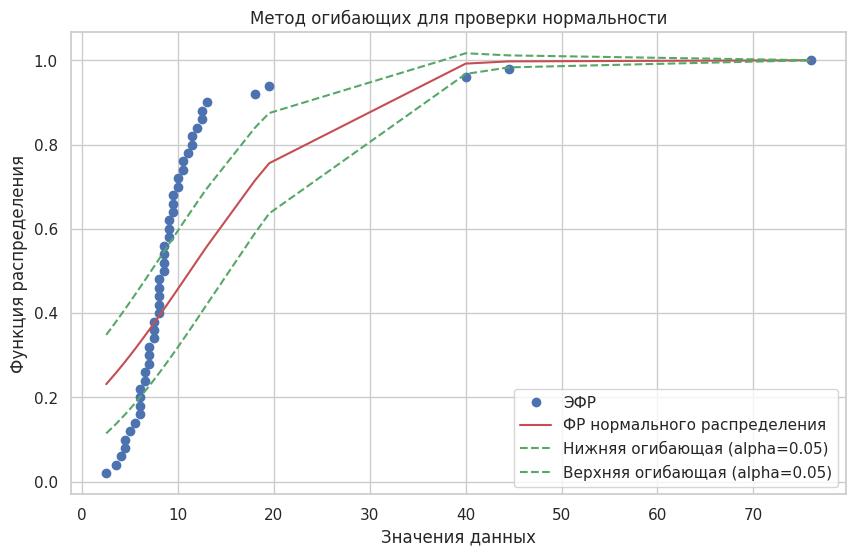


Normality Tests for Small sample (n = 50):
Kolmogorov-Smirnov test: Stat=0.3410473236579077, p-value=1.076749505394473e-05
Shapiro-Wilk test: Stat=0.48748862743377686, p-value=5.734030871645812e-12
Anderson-Darling test: Stat=8.728108775816047
Cramer-von Mises test: Stat=16.6539, p-value=0.0000
Lilliefors test: Stat=0.3416355609674444, p-value=0.0009999999999998899
Shapiro-Francia test: p-value=0.0000


In [59]:
plot_ecdf(d_small_2, len(d_small_2))
plot_qq(d_small_2, len(d_small_2))
plot_envelopes(d_small_2)
normality_tests(d_small_2, "Small sample (n = 50):")


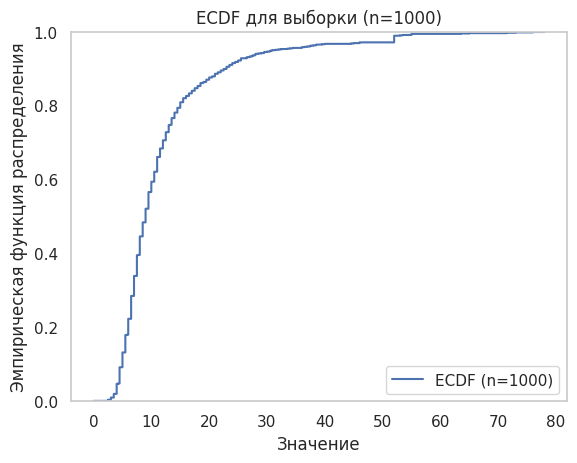

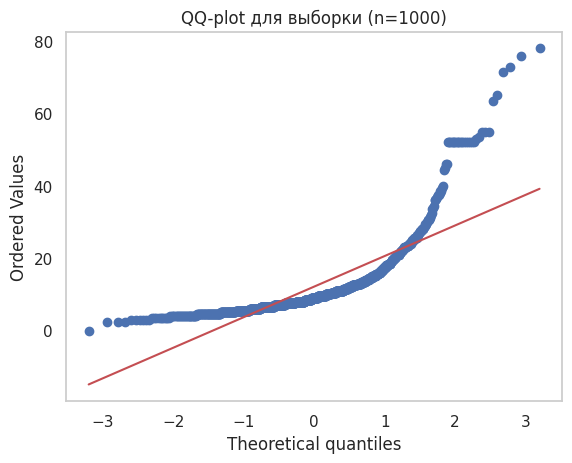

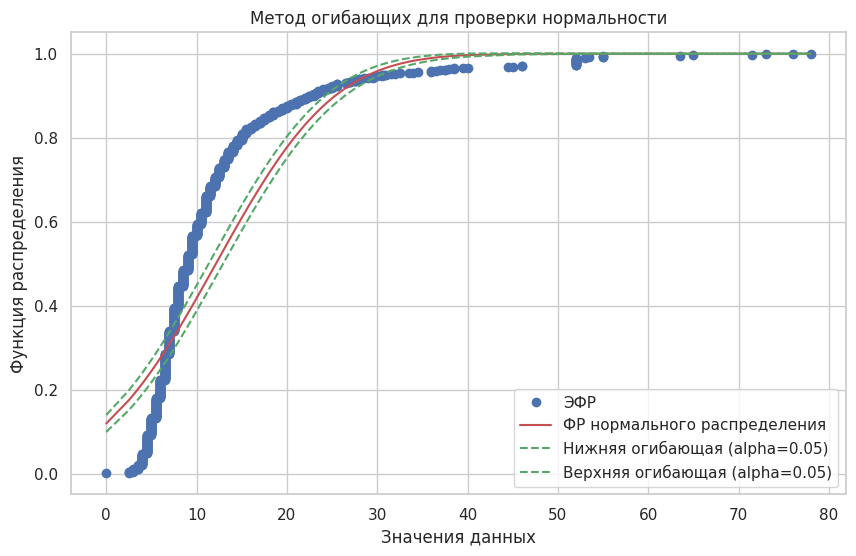


Normality Tests for Moderate Sample (n = 1000)
Kolmogorov-Smirnov test: Stat=0.21423949676371234, p-value=9.189862581515747e-41
Shapiro-Wilk test: Stat=0.6712758541107178, p-value=3.846284024878758e-40
Anderson-Darling test: Stat=94.09886265038745
Cramer-von Mises test: Stat=332.5241, p-value=0.0000
Lilliefors test: Stat=0.2142463760084211, p-value=0.0009999999999998899
Shapiro-Francia test: p-value=0.0000


In [60]:
d_moderate = df['fare_amount'].sample(n = 1000, random_state = 42)
plot_ecdf(d_moderate,  len(d_moderate ))
plot_qq(d_moderate, len(d_moderate ))
plot_envelopes(d_moderate)
normality_tests(d_moderate, "Moderate Sample (n = 1000)")